In [ ]:
import pandas as pd
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [ ]:
df_ml = pd.read_csv('https://raw.githubusercontent.com/B/HR_Data_Science/main/dataset_ML.csv')

In [ ]:
df_ml.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df_ml.head()

,city_development_index,experience,last_new_job,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Phd,education_level_Undergraduate,cdi_bucket_medium_human_development,cdi_bucket_high_human_development,cdi_bucket_very_high_human_development,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Startup Company,company_type_Unknown,major_STEM
0,0.920,21,1,36,1.0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1
1,0.776,15,5,47,0.0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1
2,0.767,21,4,8,0.0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
3,0.762,13,5,18,1.0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1
4,0.920,7,1,46,1.0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1


In [ ]:
def auc_roc_graph(ytest,preds):# creating AUC/ROC graph
  ## Calculating metrics from ytest and predicted value
  fpr, tpr, threshold = metrics.roc_curve(ytest, preds)
  roc_auc = metrics.auc(fpr, tpr)
  ## Plotting AUC-ROC
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [ ]:
def train_and_predict(X_train_model, X_test_model, y_train_model, y_test_model, classifier):  ## Function takes in traintest split dataset and ML model - fits & predicts the model, calculates metrics
  ## Training the Model
  classifier.fit(X_train_model, y_train_model)

  ## Predicting the model
  y_model_tp = classifier.predict(X_test_model)

  ## Accuracy score
  a_score = metrics.accuracy_score(y_test_model, y_model_tp)
  print("The Accuracy is {}".format(a_score))

  ## Calculating sensitivity
  TP = sum((y_test_model == 1) & (y_model_tp == 1))
  p = sum((y_test_model == 1))
  TPR = TP/p
  print("The Sensitivity / True Positive Rate (TPR) is {}".format(TPR))

  ## Calculating Specifictiy
  N = sum(y_test_model == 0)
  TN = sum((y_test_model == 0) & (y_model_tp == 0))
  TNR = TN/N
  print("The Specifictiy / TNR  is {}".format(TNR))

  # calculate recall
  recall = metrics.recall_score(y_test_model, y_model_tp, average='binary')
  print('Recall: %.3f' % recall)

  # calculating precision
  precision = metrics.precision_score(y_test_model, y_model_tp, average='binary')
  print('Precision: {}'.format(precision))

  ## Calculating F1 score
  score = metrics.f1_score(y_test_model, y_model_tp, average='binary')
  print('F1-score: {}'.format(score))

  ##Printing the roc_auc
  auc_roc_graph(y_test_model,y_model_tp)

  return [a_score,TPR,TNR, recall, precision,score]

In [ ]:
## Creating a train test split

X = df.drop('target', axis = 1)
y = df['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 780 )

In [ ]:
## Instantiating the XGboost model

XgB = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

The Accuracy is 0.7938034188034188
The Sensitivity / True Positive Rate (TPR) is 0.5022988505747127
The Specifictiy / TNR  is 0.8820459290187892
Recall: 0.502
Precision: 0.5631443298969072
F1-score: 0.5309842041312272


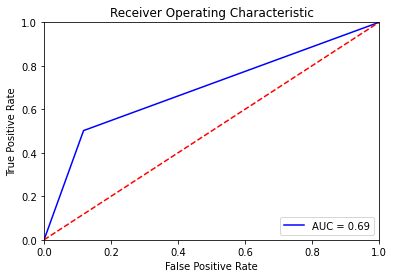

In [ ]:
xg_metrics = train_and_predict(X_train, X_test, y_train, y_test,XgB)


**Professor's Code**